# Desafío 1
Estudia mejor el histrogrma de valores, seleccionar 3 tipos de inmuebles:
- Titulos
- Aumentar el tamañp de labels
- Colores
- Conclusion de la informacion

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv( '../database/inmuebles_bogota.csv' )
col = {
    'Tipo': 'type',
    'Descripcion':'description',
    'Habitaciones':'bedrooms',
    'Baños':'bathrooms',
    'Área':'area',
    'Barrio':'mayoralty',
    'UPZ':'suburb',
    'Valor':'value'
}
df = df.rename( columns = col )
value = df['value'].str.split( expand = True )
df['currency'] = value[0]
df['price'] = value[1]
df['price'] = df['price'].str.replace( '.', '', regex = True )
df['price_K'] = df['price'].astype( 'float' ) / 1000000
pd.set_option( 'display.precision', 2 )
pd.set_option( 'display.float_format', lambda x: '%.2f' % x )

## Grafica 1 ==> label

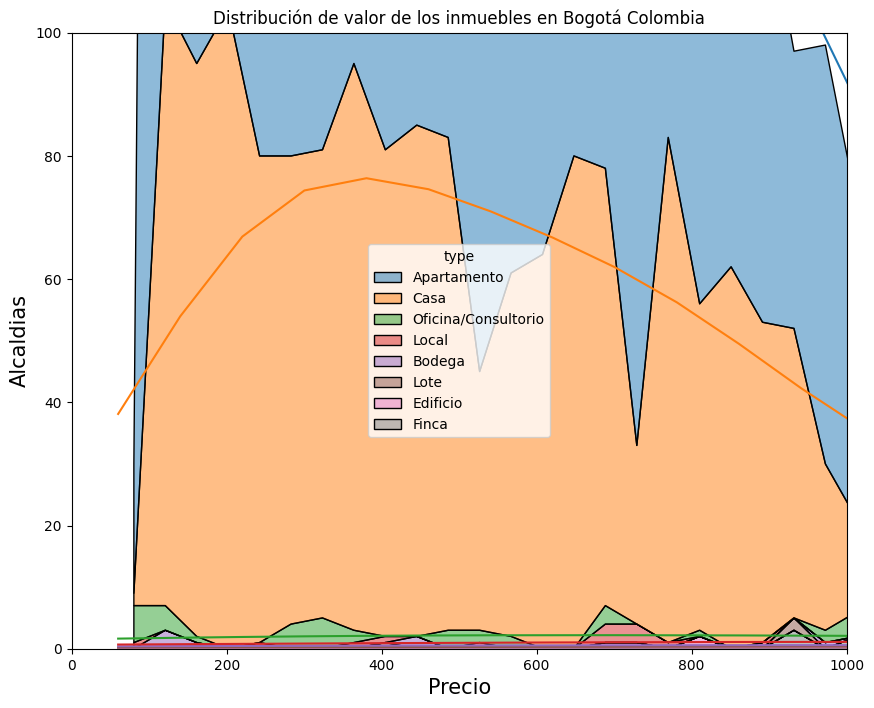

In [16]:
plt.figure( figsize = ( 10, 8 ) )
graph = sns.histplot( data = df, x = 'price_K', kde = True, hue = 'type', multiple="stack", element="poly" )
graph.set_title('Distribución de valor de los inmuebles en Bogotá Colombia')
graph.set_ylabel('Alcaldias', fontsize = 15)
graph.set_xlabel('Precio', fontsize = 15)
plt.xlim( ( 0, 1000 ) )
plt.ylim( ( 0, 100 ) )
plt.show()

## Grafica 2 ==> color

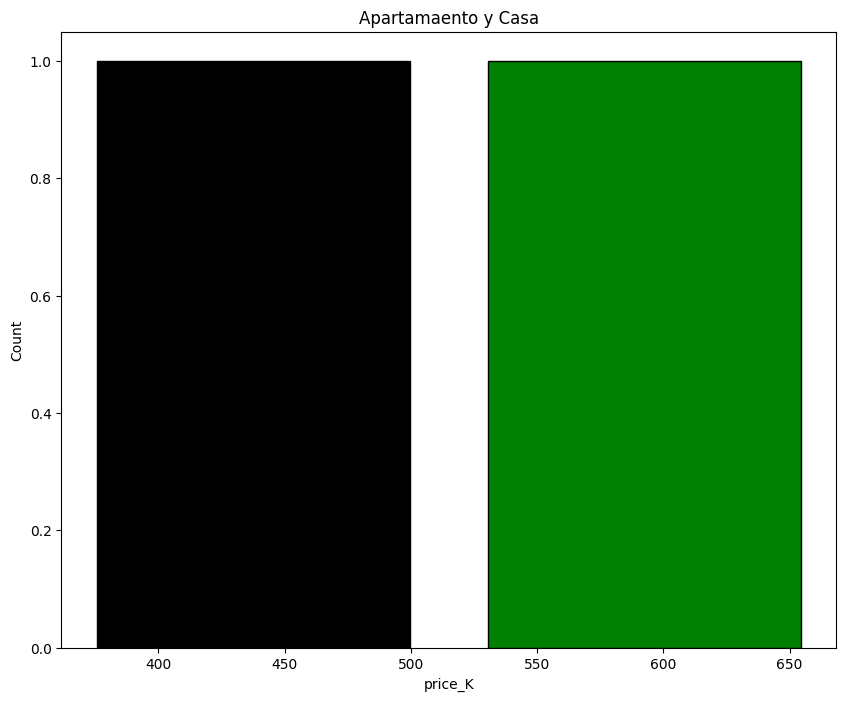

In [38]:
plt.figure( figsize = ( 10, 8 ) )
graph = sns.histplot( data = df[ [ 'price_K', 'type' ] ].head(2), x = 'price_K', shrink=.8 )
graph.set_title('Apartamaento y Casa')
graph.patches[0].set_facecolor('black')
graph.patches[1].set_facecolor('green')
plt.show()

## Grafica 3 ==> conclusion de la informacion

<Figure size 1000x800 with 0 Axes>

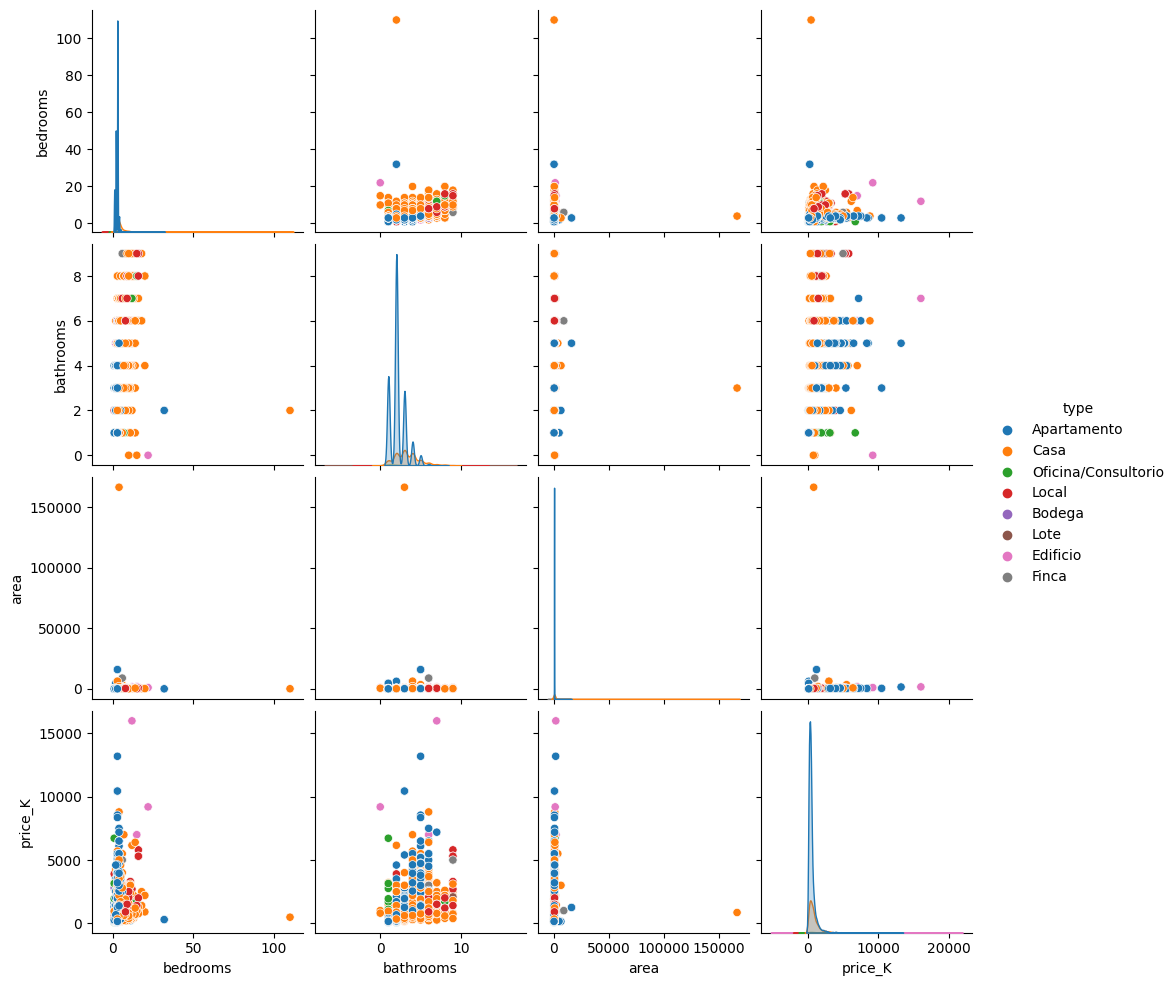

In [44]:
plt.figure( figsize = ( 10, 8 ) )
graph = sns.pairplot( data = df, hue="type")
plt.show()